## This notebook contains exemples of use of the fonctions defined in Schrodinger.py

### 1) Importation of the functions :

In [1]:
from Schrodinger import *

### 2)Ilustration of the mid-point matching technique

Here we illustrate the working principle of the midpoint matching technique on the free particle exemple. Actually, in order to perform the Numerov scheme, we need to set boundary conditions. We used vanishing boundary conditions, this imply that physically the problem we are solving is closer to an infinitly high square well.

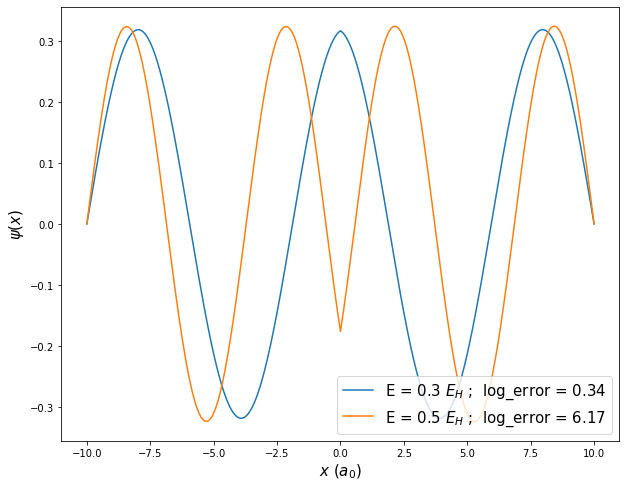

In [2]:
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#declaration of the needed variables for the Do_mid_point fonction
eps = 10**-5 #initialisation value
#spatial boundaries
x_m =-10 
x_M = 10
dx = 10**-3 #x step
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx)) #array containing the x

#Null potential fucntion:
def V_Null(x):
    return 0

#creation of the inital ranges for the wave functions
psi_range = np.zeros(int((x_M-x_m)/dx))
psi_range[1] = eps
psi_range[-2] = eps

#retrieving the index of the mid_point x_c=0
N_x_c = int(len(psi_range)/2)
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#Execution of the mid-point matchong technique for two different energies
plt.figure(figsize=[10,8])

#----------------------------------------------------------------------------------------------
E=0.3 #1st energy
log_error , N , psi_out = Do_mid_point(psi_range,x_range,V_Null,E,N_x_c) #execution of the scheme
plt.plot(x_range,normalization(psi_out,x_range),label='E = '+str(E)+r' $E_H$ ;  log_error = '+str(round(log_error,2))) #displaying the results

#----------------------------------------------------------------------------------------------
E=0.5 #2nd energy
log_error , N , psi_out = Do_mid_point(psi_range,x_range,V_Null,E,N_x_c)
plt.plot(x_range,normalization(psi_out,x_range),label='E = '+str(E)+r' $E_H$ ;  log_error = '+str(round(log_error,2)))

#----------------------------------------------------------------------------------------------

plt.xlabel(r'$x$ ($a_0$)',fontsize=15)
plt.ylabel(r'$\psi(x)$',fontsize=15)
plt.legend(fontsize=15,loc=4)

#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

### 3) Resolution of the schrodinger equation for different potentials

In [2]:
#Here we define different functions to be used as potentials 
V_0 = 5
a = 2
def V (x):
    #square well
    return -V_0/2*(1-np.sign(np.abs(x)-a))

#----------------------------------------------------------------------------------------------

b = 2
def V_2 (x):
    #quadratic well
    return V_0/2*((x/b)**2-1)*(1-np.sign(np.abs(x)-b))

#----------------------------------------------------------------------------------------------

def Lennard_Jones(a_1,a_2):
    return lambda x : - 4*V_0*( (a_1/x)**6 - (a_2/x)**12)

Creation of initial sets
Mid-point matching set at : x = 0.0

-Finding energy ranges with fix number of nodes :
Number of ranges found so far : 5

-Performing dichotomy on each energy ranges to find solutions :


  0%|          | 0/5 [00:00<?, ?it/s]

Ignoring an ambiguous solution : energy of the solution is one of the boundaries

-Formating the results:


  0%|          | 0/4 [00:00<?, ?it/s]


-Checking the orthogonality :
maximum amplitude of scalar product :  -0.08573310114541885

-Plotting the solutions :


  0%|          | 0/4 [00:00<?, ?it/s]

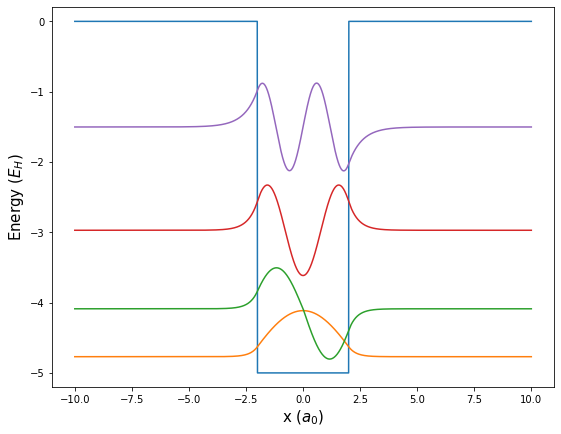

In [5]:
#we now use the function resolution to solve the schrödinger equation for the square well
#see the comments in Schrodinger.py for explanations of the different parameters
resolution(V=V,E_min=-V_0,E_max=0,x_m=-10,x_M=10,x_c=0,dx=10**-2,eps=10**-7,err=10**-2)

The function found 5 interesting energy ranges, but for one of them the energy wich minimizes the error matches with one of the energy boundary. The function cannot be certain that it is a valid solution, so it ignores it.

Creation of initial sets
Mid-point matching set at : x = 0.0

-Finding energy ranges with fix number of nodes :
Number of ranges found so far : 3

-Performing dichotomy on each energy ranges to find solutions :


  0%|          | 0/3 [00:00<?, ?it/s]


-Formating the results:


  0%|          | 0/3 [00:00<?, ?it/s]


-Checking the orthogonality :
maximum amplitude of scalar product :  -0.029469760990347205

-Plotting the solutions :


  0%|          | 0/3 [00:00<?, ?it/s]

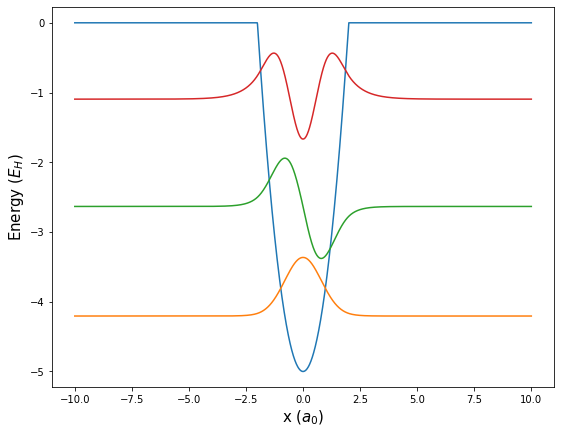

In [6]:
#for the quadratic well
resolution(V=V_2,E_min=-V_0,E_max=-0.01,x_m=-10,x_M=10,x_c=0,dx=10**-2,eps=10**-6,err=10**-2)

Creation of initial sets
Mid-point matching set at : x = 10.0

-Finding energy ranges with fix number of nodes :
Number of ranges found so far : 7

-Performing dichotomy on each energy ranges to find solutions :


  0%|          | 0/7 [00:00<?, ?it/s]


-Formating the results:


  0%|          | 0/7 [00:00<?, ?it/s]


-Checking the orthogonality :
maximum amplitude of scalar product :  -0.007569221842224331

-Plotting the solutions :


  0%|          | 0/7 [00:00<?, ?it/s]

[(-4.0986074547100095, 0),
 (-2.63570314837977, 1),
 (-1.5622027915685115, 2),
 (-0.8198349460179095, 3),
 (-0.3547637756002487, 4),
 (-0.11039655926519903, 5),
 (-0.01436506779413907, 6)]

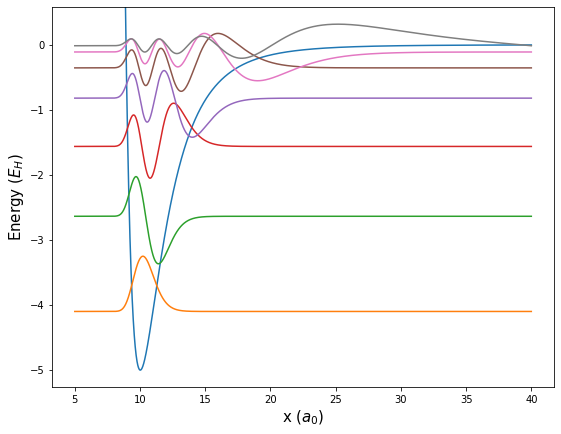

In [5]:
#for the Lennard-Jones potential
resolution(V=Lennard_Jones(1/1.12*10,1/1.12*10),E_min=-V_0,E_max=-0.01,x_m=5,x_M=40,x_c=10,dx=10**-2,eps=10**-7,err=10**-2)

The validity of the solutions found by the resolution function

In [6]:
help(numerov)

Help on function numerov in module Schrodinger:

numerov(psi_range, x_range, V, E, direction, i_start=2)
    This function applies the numerov scheme on a discretized 1D space represented by x_range, in order to produce an approximate solution of the Schödinger
    equation with the potential V and the energy E.
    
    psi_range = array which will contain the psi_i, with the boundary values already initialised
    x_range = array containing the values of x
    V = function for the potential
    E = Energy to be tested
    direction -> 1 = increasing x ; -1 = decreasing x
    i_start = index of the first element of psi_range to be calculated by the numerov scheme
    
    return : an array containing the approximate solution psi(x) for each x of x_range

